In [1]:
from pprint import pprint

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

%matplotlib inline
import matplotlib.pyplot as plt

import unicodedata
import re
import json
from time import strftime
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from explore_miatta import clean
from wrangle import nlp_wrangle

ModuleNotFoundError: No module named 'acquire'

In [ ]:
words_df = pd.read_json('/Users/derekbixby/codeup-data-science/nlp-project/bixby-work/data2.json')
words_df


In [4]:
def tokenize(text):
    """
    Tokenizes the words in the input string.
    """
    tokenizer = ToktokTokenizer()
    tokens = tokenizer.tokenize(text)
    return tokens

def clean(text: str) -> list: 
    """
    Cleans up the input text data.
    """
    text = (text.encode('ascii', 'ignore')
                .decode('utf-8', 'ignore')
                .lower())
    
    words = re.sub(r'[^\w\s]', ' ', text).split()
    
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = set(nltk.corpus.stopwords.words('english'))
    
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

def nlp_wrangle():
    """
    Performs data wrangling for natural language processing (NLP) tasks.
    Returns a processed DataFrame for NLP analysis.
    """
    # Load data from JSON file
    df = pd.read_json('data2.json')
    
    # Tokenize and clean contents
    df['clean_contents'] = df.readme_contents.apply(tokenize).apply(' '.join)
    df['clean_contents'] = df.clean_contents.apply(clean).apply(' '.join)
    
     # Words to remove
    words_to_remove = ['http', 'com', '124', 'www','github', 'top', 'go','107', '0','1','2','3','4', '5', '6', '7', '8','9', 'md','p', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'em', 'abbr', 'q','ins', 'del', 'dfn', 'kbd', 'pre', 'samp', 'var', 'br', 'div', 'a', 'img', 'param', 'ul','ol', 'li', 'dl', 'dt', 'dd']

    # Remove specific words from clean_contents
    for word in words_to_remove:
        df['clean_contents'] = df['clean_contents'].str.replace(word, '')

    # Add message_length and word_count columns
    df['message_length'] = df['clean_contents'].str.len()
    df['word_count'] = df.clean_contents.apply(clean).apply(len)

    # Keep only top languages and assign others to 'Other'
    languages_to_keep = ['JavaScript', 'Python', 'Java', 'TypeScript', 'HTML']
    df['language'] = np.where(df['language'].isin(languages_to_keep), df['language'], 'Other')

    # Filter DataFrame based on conditions
    df = df.loc[(df['word_count'] <= 10000) & (df['message_length'] <= 60000)]

    return df

def intersection_list():
    words_df = nlp_wrangle()
    readme_words_list = words_df.clean_contents.to_list()
    readme_words_list

    readme_words = []
    for list in readme_words_list:
        split_list = list.split()
        readme_words.append(split_list)

    words_list = []
    for _ in readme_words:
        for el in _:
            words_list.append(el)

    dictionary_words = pd.read_csv('/usr/share/dict/words', header=None)
    dictionary_words = dictionary_words.drop(index=[122337,122338])
    dictionary_words = dictionary_words.squeeze()
    intersect = set(words_list) & set(dictionary_words)
    intersect = sorted(intersect)
    return intersect

def extra_clean_column(words_df):
    extra_clean_article = []
    for i in words_df.index:
        article_words = words_df.clean_contents[i].split()
        extra_clean = set(intersect) & set(article_words)
        extra_clean = sorted(extra_clean)
        extra_clean = ' '.join(extra_clean)
        extra_clean_article.append(extra_clean)

    words_df = words_df.assign(extra_clean_contents = extra_clean_article) 
    return words_df

Extra letters: , 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'

In [5]:
words_df = nlp_wrangle()
intersect = intersection_list()
words_df = extra_clean_column(words_df)
words_df

,repo,language,readme_contents,clean_contents,message_length,word_count,extra_clean_contents
0,TheAlgorithms/Python,Python,"<div align=""center"">\n<!-- Title: -->\n <a hr...",gn center title href thelrithms src rw u...,1585,257,b better blob blue build center code contribut...
1,apache/flink,Java,# Apache Flink\n\nApache Flink is an open sour...,che fnk che fnk oen source strem rocessing frm...,2722,454,bug build building built che check clone code ...
2,forezp/SpringCloudLearning,Java,>转载请标明出处： \n> http://blog.csdn.net/forezp/arti...,blog csdn net forez rticle detil blog csdn ...,4370,617,boot boots bus center cloud cor discovery f fe...
3,learn-co-students/python-dictionaries-readme-d...,Other,\n# Dictionaries \n\n### Introduction\n\nAfter...,dictionry introduction introducing working st ...,5385,828,bee beginning bit built ce continue correct co...
4,angular/angular-phonecat,JavaScript,# AngularJS Phone Catalog Tutorial Application...,ngrjs hone ctlog tutoril ction overview ction ...,6259,1028,b best binding bine building cent check checko...
...,...,...,...,...,...,...,...
109,lin-xin/vue-manage-system,Other,"{""payload"":{""allShortcutsEnabled"":false,""fileT...",ylod llshortcutsenbled flse filetree it nme t...,15727,2730,best blob body build c cense checked clone cod...
110,Significant-Gravitas/Auto-GPT,Python,"{""payload"":{""allShortcutsEnabled"":false,""fileT...",ylod llshortcutsenbled flse filetree it nme de...,30234,4748,b bed blob block blue body border bottom busin...
112,namndwebdev/tang-crush,JavaScript,"{""payload"":{""allShortcutsEnabled"":false,""fileT...",ylod llshortcutsenbled flse filetree it nme cs...,5387,830,bit blob body c cho code content coy crush d d...
113,learn-co-students/javascript-arrays-lab-bootca...,JavaScript,"{""payload"":{""allShortcutsEnabled"":false,""fileT...",ylod llshortcutsenbled flse filetree it nme te...,8871,1248,beginning bit bite blob body bug butter cense ...


In [ ]:
words_df = nlp_wrangle()
words_df

In [ ]:
words_df.language.value_counts()

In [26]:
words_df.isnull().sum()

repo                    0
language                0
readme_contents         0
clean_contents          0
message_length          0
word_count              0
extra_clean_contents    0
dtype: int64

In [6]:
def split_data(df, variable):
    """
    Splits the data into train, validate, and test DataFrames.

    Args:
    df (pandas.DataFrame): Input DataFrame.
    variable (str): Target variable name.

    Returns:
    train, validate, test DataFrames.

    """
    train_validate, test = train_test_split(df, test_size=0.20, random_state=123, stratify=df[variable])
    train, validate = train_test_split(train_validate, test_size=0.25, random_state=123, stratify=train_validate[variable])
    return train, validate, test


In [7]:
train, validate, test = split_data(words_df, 'language')
train.head()

,repo,language,readme_contents,clean_contents,message_length,word_count,extra_clean_contents
31,apache/kafka,Java,"{""payload"":{""allShortcutsEnabled"":false,""fileT...",ylod llshortcutsenbled flse filetree it nme t...,40624,5749,bin bind blob body bug build building built c ...
22,learn-co-students/python-variables-lab-data-sc...,Other,"{""payload"":{""allShortcutsEnabled"":false,""fileT...",ylod llshortcutsenbled flse filetree it nme fu...,7318,987,blob body c cense code content coy desk direct...
37,learn-co-students/js-from-dom-to-node-bootcamp...,JavaScript,"{""payload"":{""allShortcutsEnabled"":false,""fileT...",ylod llshortcutsenbled flse filetree it nme mo...,13227,2012,bee begin best big blob body bottom c cense ch...
16,bloominstituteoftechnology/React-Todo,HTML,"{""payload"":{""allShortcutsEnabled"":false,""fileT...",ylod llshortcutsenbled flse filetree it nme ub...,10808,1656,b best blob body building button c checkout cl...
102,zhisheng17/flink-learning,Java,"{""payload"":{""allShortcutsEnabled"":false,""fileT...",ylod llshortcutsenbled flse filetree it nme fn...,47284,7578,b bey bin blob body book buffer build c ce cee...


In [8]:
python_words = clean(' '.join(train[train.language=="Python"]['extra_clean_contents']))
java_words = clean(' '.join(train[train.language=="Java"]['extra_clean_contents']))
script_words = clean(' '.join(train[train.language=="JavaScript"]['extra_clean_contents']))
html_words = clean(' '.join(train[train.language=="HTML"]['extra_clean_contents']))
type_words = clean(' '.join(train[train.language=="TypeScript"]['extra_clean_contents']))
other_words = clean(' '.join(train[train.language=="Other"]['extra_clean_contents']))
all_words = clean(' '.join(test['extra_clean_contents']))


In [9]:
set_python_words = set(python_words)
set_python_words

{'b',
 'bed',
 'bee',
 'begin',
 'beginning',
 'better',
 'bib',
 'big',
 'bigger',
 'bin',
 'binder',
 'bird',
 'blob',
 'block',
 'blue',
 'body',
 'book',
 'bord',
 'border',
 'bot',
 'bottom',
 'bug',
 'build',
 'building',
 'built',
 'bum',
 'business',
 'c',
 'ce',
 'cense',
 'cent',
 'center',
 'che',
 'check',
 'checker',
 'checkout',
 'chin',
 'choose',
 'choosing',
 'chosen',
 'circle',
 'cite',
 'clone',
 'cluster',
 'clustering',
 'cod',
 'code',
 'coffee',
 'cond',
 'condition',
 'conference',
 'configure',
 'connect',
 'connector',
 'consider',
 'considered',
 'content',
 'context',
 'continuous',
 'contribute',
 'contribution',
 'contributor',
 'convert',
 'cor',
 'core',
 'corke',
 'correct',
 'correctly',
 'cost',
 'course',
 'cover',
 'coy',
 'cross',
 'cud',
 'current',
 'currently',
 'curve',
 'custom',
 'cut',
 'cutting',
 'de',
 'decision',
 'dee',
 'defend',
 'deft',
 'derived',
 'desired',
 'desk',
 'detection',
 'determine',
 'dev',
 'device',
 'direct',
 'dire

In [10]:
len(set_python_words)

484

In [11]:
python_words

['b',
 'bed',
 'blob',
 'block',
 'blue',
 'body',
 'border',
 'bottom',
 'business',
 'c',
 'cense',
 'center',
 'check',
 'chin',
 'code',
 'coffee',
 'configure',
 'connect',
 'content',
 'contributor',
 'cor',
 'cost',
 'cover',
 'decision',
 'defend',
 'desk',
 'device',
 'directory',
 'discord',
 'discussion',
 'dismiss',
 'doc',
 'docker',
 'driven',
 'due',
 'e',
 'en',
 'ensure',
 'entry',
 'er',
 'f',
 'fee',
 'file',
 'first',
 'fit',
 'flow',
 'flowing',
 'fly',
 'free',
 'fruition',
 'fund',
 'future',
 'g',
 'get',
 'gree',
 'h',
 'height',
 'highly',
 'history',
 'hook',
 'icon',
 'id',
 'ide',
 'indoor',
 'interesting',
 'io',
 'issue',
 'join',
 'key',
 'l',
 'let',
 'level',
 'lo',
 'login',
 'long',
 'look',
 'loss',
 'lug',
 'ly',
 'medium',
 'metis',
 'min',
 'mo',
 'mode',
 'monitor',
 'must',
 'n',
 'ne',
 'network',
 'new',
 'news',
 'nexus',
 'note',
 'notice',
 'nucleus',
 'occur',
 'often',
 'one',
 'ose',
 'ref',
 'reference',
 'refinery',
 'rel',
 'reset',


In [12]:
len(python_words), len(java_words), len(script_words), len(html_words), len(type_words), len(other_words), len(all_words)

(983, 767, 1839, 404, 229, 2860, 1831)

In [13]:
python_freq = pd.Series(python_words).value_counts()
java_freq = pd.Series(java_words).value_counts()
script_freq = pd.Series(script_words).value_counts()
html_freq = pd.Series(html_words).value_counts()
type_freq = pd.Series(type_words).value_counts()
all_freq = pd.Series(all_words).value_counts()
other_freq = pd.Series(other_words).value_counts()


# Question 3: What are the most frequently used words throughout the dataset and for each language?

In [14]:
word_counts = pd.concat([python_freq, java_freq, script_freq, html_freq, type_freq, other_freq, all_freq], axis=1).fillna(0).astype(int)

# rename the col names
word_counts.columns = ['python', 'java', 'script', 'html', 'type', 'other', 'all']

word_counts.head()

,python,java,script,html,type,other,all
u,9,8,18,5,2,31,21
security,7,6,16,4,1,25,16
n,7,7,16,4,1,25,16
directory,7,7,15,4,1,22,16
discussion,7,6,16,4,1,25,16


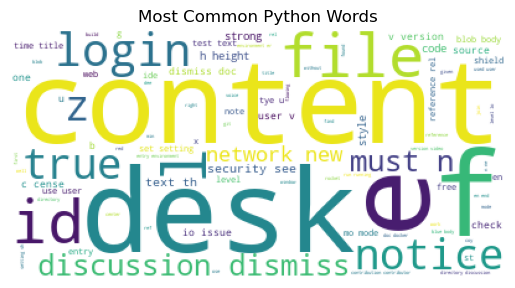

In [16]:
img = WordCloud(background_color='white').generate(' '.join(python_words))

plt.imshow(img)
plt.axis('off')
plt.title('Most Common Python Words')
plt.show()



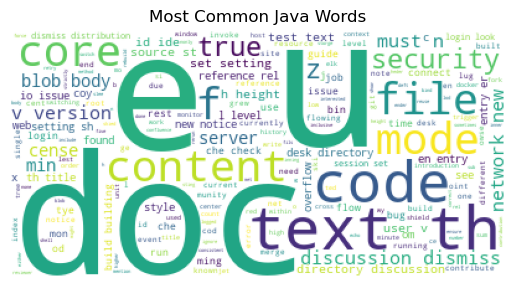

In [17]:
img = WordCloud(background_color='white').generate(' '.join(java_words))

plt.imshow(img)
plt.axis('off')
plt.title('Most Common Java Words')
plt.show()



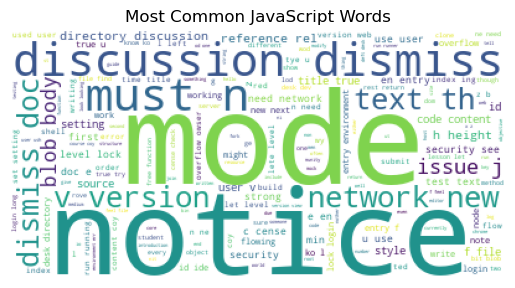

In [18]:
img = WordCloud(background_color='white').generate(' '.join(script_words))

plt.imshow(img)
plt.axis('off')
plt.title('Most Common JavaScript Words')
plt.show()



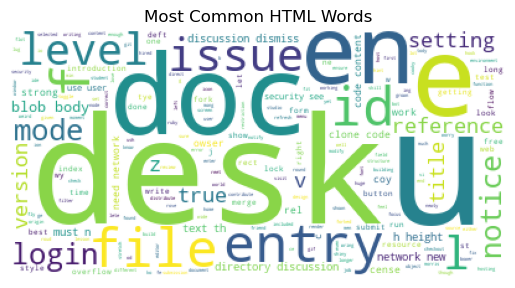

In [19]:
img = WordCloud(background_color='white').generate(' '.join(html_words))

plt.imshow(img)
plt.axis('off')
plt.title('Most Common HTML Words')
plt.show()



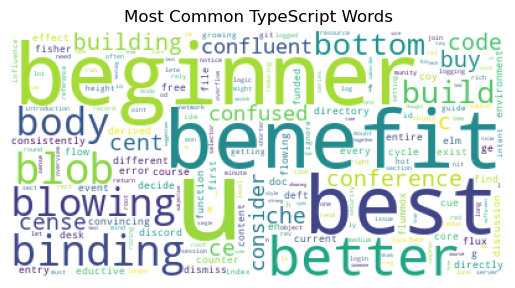

In [20]:
img = WordCloud(background_color='white').generate(' '.join(type_words))

plt.imshow(img)
plt.axis('off')
plt.title('Most Common TypeScript Words')
plt.show()



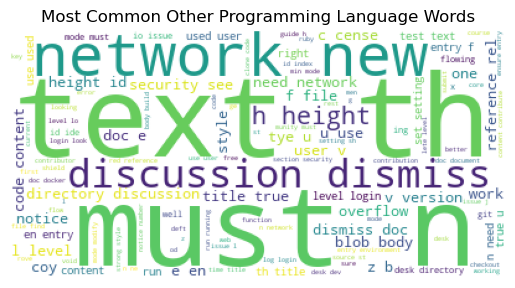

In [21]:
img = WordCloud(background_color='white').generate(' '.join(other_words))

plt.imshow(img)
plt.axis('off')
plt.title('Most Common Other Programming Language Words')
plt.show()



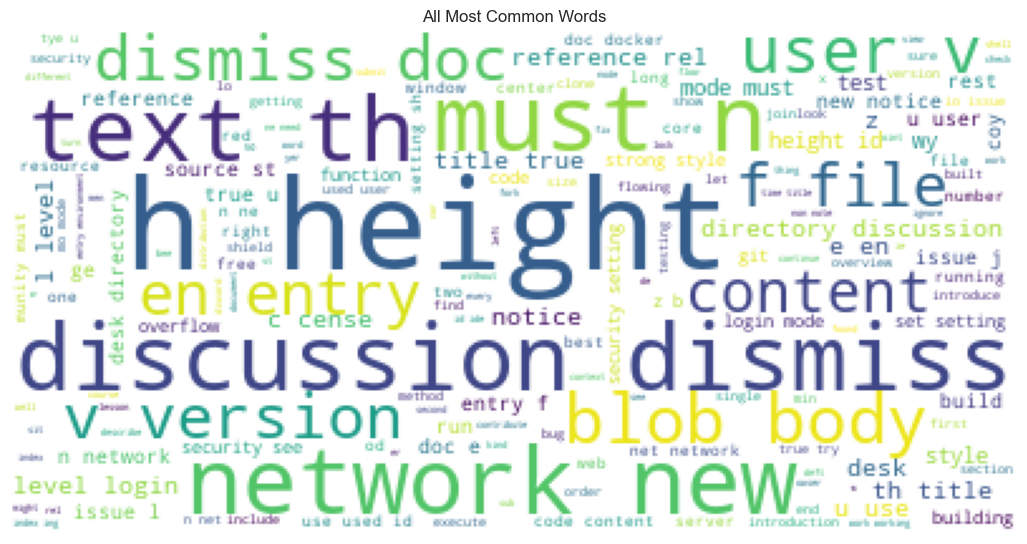

In [25]:
img = WordCloud(background_color='white').generate(' '.join(all_words))

plt.imshow(img)
plt.axis('off')
plt.title('All Most Common Words')
plt.show()


# Question 1: Are there any notable variations in the frequency of words between README files written in different programming languages?

In [24]:
word_counts.sort_values('all', ascending=False)

,python,java,script,html,type,other,all
u,9,8,18,5,2,31,21
e,7,7,16,4,1,27,20
height,7,6,16,4,1,25,19
must,7,6,16,4,1,25,18
reference,7,6,16,4,1,25,18
...,...,...,...,...,...,...,...
suggestion,0,0,1,0,1,3,0
urge,0,0,1,0,0,0,0
ber,0,0,1,0,0,0,0
bound,0,0,1,0,0,0,0


In [22]:
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

/var/folders/_6/0nkpzhxj2_n85fz5s1rk__xr0000gn/T/ipykernel_62614/2210698556.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


<Axes: >

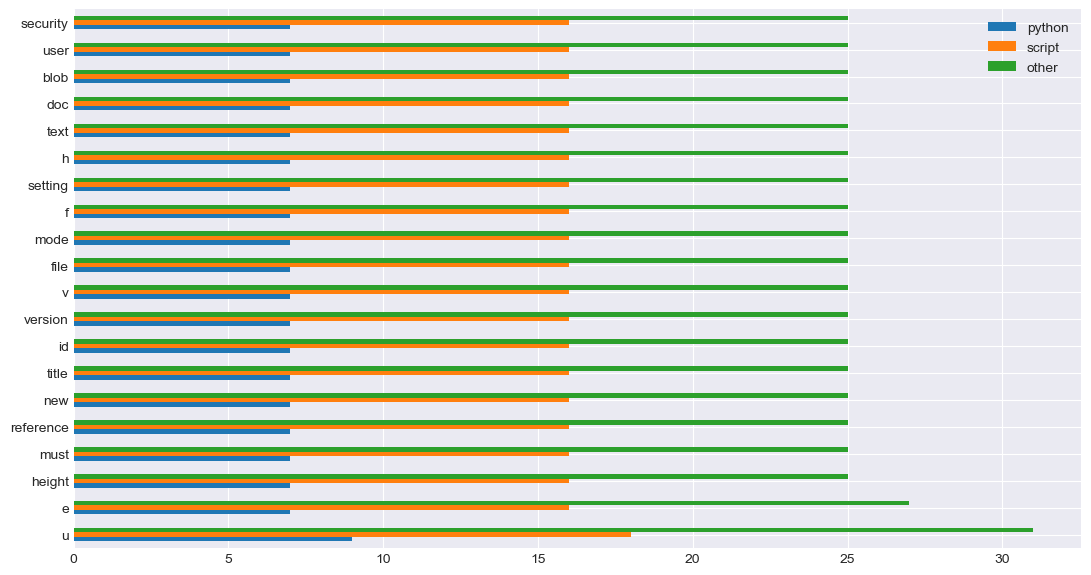

In [23]:
word_counts.sort_values('all', ascending=False)[['python', 'script', 'other']].head(20).plot.barh()